In [11]:
#Test flow cytometry data output counts-poisson model fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson, poisson, chisquare, skew, skewtest
import statsmodels.api as sm

# Specify the path to your CSV file
df = pd.read_csv('844-220v1_081723 CD4+CD127 counts.csv')

df = pd.DataFrame(df)
#print(df)

In [12]:
# Create a new DataFrame with repeated values based on counts
result_array = np.repeat(df['value'], df['count'])
result_df = pd.DataFrame({'value': np.repeat(df['value'], df['count'])})

# Convert the result to a NumPy array if needed
result_array = result_df['value'].to_numpy()

print(result_array)

#estimate appropriate bin sizes based on data
#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )

[-108.4815635   -73.94877614  -42.05004876  -38.22551138  -28.029145
  -20.38368954   11.46533868   21.65784512   24.20625481   26.7548089
   40.77514177   43.32501962   47.15033563   48.42558217   52.25177381
   58.63038904   66.28773197   77.7808277    79.05841889   86.72664214
   94.39978786   95.67915683   95.67915683  100.7981737   108.4815635
  109.7627244   112.325577    125.1510407   125.1510407   127.7185004
  134.1408281   141.8548887   141.8548887   144.4280848   145.7150389
  147.0022335   149.5773536   149.5773536   150.865284    152.1534643
  153.441897    162.468194    162.468194    162.468194    165.0495444
  165.0495444   166.3406332   167.6320009   167.6320009   172.80031
  181.8561581   184.4462833   184.4462833   187.0376629   189.6303172
  192.2242664   194.8195307   196.1176624   198.7149377   198.7149377
  198.7149377   202.6134191   203.913608    205.2141489   206.5150443
  207.8162968   207.8162968   207.8162968   207.8162968   209.117909
  210.4198835   211.72

In [13]:
#read in second dataset
# Specify the path to your CSV file
df2 = pd.read_csv('844-220v1_100323 CD4+CD127 counts.csv')

df2 = pd.DataFrame(df2)
#print(df2)

# Create a new DataFrame with repeated values based on counts
result_array2 = np.repeat(df2['value'], df2['count'])
result_df2 = pd.DataFrame({'value': np.repeat(df2['value'], df2['count'])})

# Convert the result to a NumPy array if needed
result_array2 = result_df2['value'].to_numpy()

print(result_array2)

#estimate appropriate bin sizes based on data
#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array2, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )

[ -17.83546717    8.91741774   20.38368954   82.89194424   82.89194424
   90.56257057  100.7981737   107.2005766   126.4346678   136.7112791
  149.5773536   165.0495444   170.2155829   184.4462833   184.4462833
  185.741815    188.3338295   189.6303172   189.6303172   190.9271287
  201.3135794   222.1543927   226.0727977   231.3029052   232.6114443
  233.9203937   237.8497307   240.4713902   247.0330544   248.3466977
  253.6057318   254.9216195   254.9216195   257.5547697   266.7855271
  272.0708064   273.3933551   273.3933551   286.6466749   287.9748548
  290.6328063   298.6196099   299.9526637   301.2862742   301.2862742
  302.6204443   302.6204443   303.9551771   306.6263428   324.0457752
  326.7346987   326.7346987   333.467887    336.1655808   341.568684
  341.568684    342.921086    346.9822468   346.9822468   351.0494083
  353.7642266   353.7642266   357.8415862   360.5632859   366.0151096
  366.0151096   367.3798401   367.3798401   370.1114542   371.4783446
  372.8459617   376.

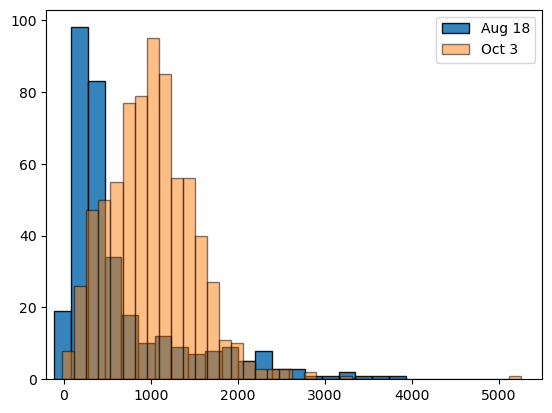

In [15]:
#plot data, exclude x-values >5500
#alpha value in plt.hist line indicates how bold the plotted bars are
#alpha = 1, indicates no transparency
plt.hist(result_array, bins=21, edgecolor='black', label='Aug 18', alpha=0.9)
plt.hist(result_array2, bins=38, edgecolor='black', label='Oct 3', alpha=0.5)
plt.xlim(-200, 5500)
plt.legend()
plt.show()

In [16]:
#test the distribution of dataset1
#does it follow a normal distribution?
#Shapiro-Wilk Test

# Assuming 'data' is your DataFrame or array of values
stat, p_value = shapiro(result_array)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")


Statistic: 0.7595208287239075, p-value: 1.0008990425055338e-21
Data does not look normally distributed (reject H0)


In [17]:
#Statistical Skewness Test

# Calculate skewness
skewness = skew(result_array)

# Perform skewness test
stat, p_value = skewtest(result_array)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Skewness: 1.8679884105266957, p-value: 6.303886576140849e-23
Data is significantly skewed (reject H0)


In [18]:
#test the distribution of dataset2
#does it follow a normal distribution?
#Shapiro-Wilk Test

# Assuming 'data' is your DataFrame or array of values
stat, p_value = shapiro(result_array2)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")


Statistic: 0.941779375076294, p-value: 1.941752886664539e-16
Data does not look normally distributed (reject H0)


In [19]:
#Statistical Skewness Test

# Calculate skewness
skewness = skew(result_array2)

# Perform skewness test
stat, p_value = skewtest(result_array2)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Skewness: 1.2622286791069606, p-value: 3.115107433740844e-29
Data is significantly skewed (reject H0)


In [20]:
#Since the data are skewed, need to use a distribution-free method
#Mann-Whitney Test (similar to a Wilcoxon rank sum test) Two (unpaired) samples
from scipy.stats import mannwhitneyu

# Assuming result_array and result_array2 are your data arrays

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(result_array, result_array2)

# Output the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")


Mann-Whitney U statistic: 65959.5
P-value: 3.4863682790829753e-34
Reject the null hypothesis. There is a significant difference between the two groups.


In [24]:
#####################
#Now compare the CD8 data
#####################

# Specify the path to your CSV file
df3 = pd.read_csv('844-220v1_081723 CD8+CD127 counts.csv')

df3 = pd.DataFrame(df3)
#print(df3)

# Create a new DataFrame with repeated values based on counts
result_array3 = np.repeat(df3['value'], df3['count'])
result_df3 = pd.DataFrame({'value': np.repeat(df3['value'], df3['count'])})

# Convert the result to a NumPy array if needed
result_array3 = result_df3['value'].to_numpy()

print(result_array3)

#estimate appropriate bin sizes based on data
#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array3, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )

[ -39.50029664  -34.40149478   36.95078398   45.87516104   50.97629923
   54.8029653    73.94877614  117.4534682   145.7150389   152.1534643
  159.8879301   161.1779274   168.92365     175.386202    185.741815
  187.0376629   189.6303172   190.9271287   193.5217328   194.8195307
  214.3280073   236.5395341   244.4070866   248.3466977   249.6607843
  249.6607843   256.2379645   258.8720378   268.1061154   283.9918922
  285.3190217   291.9625838   294.6237576   305.2904755   307.9627818
  309.2997958   321.3593004   324.0457752   338.8658379   342.921086
  344.274145    349.6930156   367.3798401   381.0671174   385.1877836
  386.5628567   387.9386944   425.3882639   445.0503846   453.5314816
  530.017211    552.2281238   583.7904471   698.344505    708.1345734
  716.3406336   722.9371998   727.90337     818.4671038   877.8278792
 1358.853676   2217.602445  ]

Estimated Bin Number using Auto Rule: 23


In [25]:
#read in second dataset
# Specify the path to your CSV file
df4 = pd.read_csv('844-220v1_100323 CD8+CD127 counts.csv')

df4 = pd.DataFrame(df4)
#print(df4)

# Create a new DataFrame with repeated values based on counts
result_array4 = np.repeat(df4['value'], df4['count'])
result_df4 = pd.DataFrame({'value': np.repeat(df4['value'], df4['count'])})

# Convert the result to a NumPy array if needed
result_array4 = result_df4['value'].to_numpy()

print(result_array4)

#estimate appropriate bin sizes based on data
#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array4, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )

[   0.           66.28773197   73.94877614   77.7808277    81.61397502
  129.002541    139.2826264   143.1413688   148.2896709   154.7305845
  165.0495444   176.679591    190.9271287   190.9271287   209.117909
  220.8490388   224.7662695   227.3797226   228.6870471   237.8497307
  245.7198516   248.3466977   249.6607843   266.7855271   270.7487522
  270.7487522   280.0136161   283.9918922   287.9748548   297.2871096
  302.6204443   311.9755607   317.3341247   326.7346987   360.5632859
  363.2877848   364.6510923   376.9532077   385.1877836   386.5628567
  387.9386944   389.3153001   392.0708299   401.7398956   403.1243758
  432.3904485   450.700726    450.700726    452.1156352   453.5314816
  457.784683    460.624908    466.3169169   469.1687638   472.0245479
  473.4539263   476.3156761   487.80317     492.1279746   493.5716688
  502.2560965   505.1594865   508.0672227   508.0672227   509.5227312
  513.895869    525.6068109   534.4380464   535.9139976   541.8296174
  547.7643538   555.

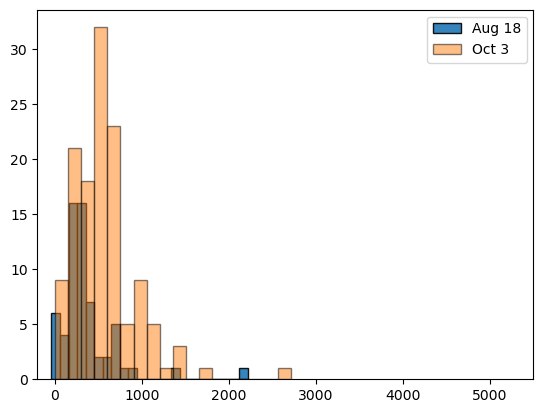

In [26]:
#plot data, exclude x-values >5500
#alpha value in plt.hist line indicates how bold the plotted bars are
#alpha = 1, indicates no transparency
plt.hist(result_array3, bins=23, edgecolor='black', label='Aug 18', alpha=0.9)
plt.hist(result_array4, bins=18, edgecolor='black', label='Oct 3', alpha=0.5)
plt.xlim(-200, 5500) #adjust based on sample values
plt.legend()
plt.show()

In [27]:
#test the distribution of dataset3
#does it follow a normal distribution?
#Shapiro-Wilk Test

# Assuming 'data' is your DataFrame or array of values
stat, p_value = shapiro(result_array3)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")

#########################
#Statistical Skewness Test

# Calculate skewness
skewness = skew(result_array3)

# Perform skewness test
stat, p_value = skewtest(result_array3)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Statistic: 0.7131149172782898, p-value: 1.0564290553460864e-09
Data does not look normally distributed (reject H0)
Skewness: 3.1016051811225047, p-value: 1.5806208002670406e-10
Data is significantly skewed (reject H0)


In [28]:
#test the distribution of dataset3
#does it follow a normal distribution?
#Shapiro-Wilk Test

# Assuming 'data' is your DataFrame or array of values
stat, p_value = shapiro(result_array4)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")

#########################
#Statistical Skewness Test

# Calculate skewness
skewness = skew(result_array4)

# Perform skewness test
stat, p_value = skewtest(result_array4)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Statistic: 0.8647116422653198, p-value: 1.902316304480678e-09
Data does not look normally distributed (reject H0)
Skewness: 2.022033780564614, p-value: 1.6730548513534985e-11
Data is significantly skewed (reject H0)


In [29]:
#Since the data are skewed, need to use a distribution-free method
#Mann-Whitney Test (similar to a Wilcoxon rank sum test) Two (unpaired) samples
from scipy.stats import mannwhitneyu

# Assuming result_array and result_array2 are your data arrays

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(result_array3, result_array4)

# Output the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")


Mann-Whitney U statistic: 2251.0
P-value: 1.367259168145118e-06
Reject the null hypothesis. There is a significant difference between the two groups.
